In [1]:
# # 한글폰트 사용 in colab
# %matplotlib inline  

# import matplotlib as mpl 
# import matplotlib.pyplot as plt 
# import matplotlib.font_manager as fm  

# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

# path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
# font_name = fm.FontProperties(fname=path, size=10).get_name()
# print(font_name)
# plt.rc('font', family=font_name)

# font_prop = fm.FontProperties(fname=path)
# plt.rcParams['font.family'] = font_prop.get_name()
# mpl.rcParams['axes.unicode_minus'] = False

In [2]:
### 한글 문제
# import unicodedata


# label_data = [unicodedata.normalize('NFC', one_ans_val) for one_ans_val in answer_value]

# submission["label"] = label_data
# submission.to_csv(submission_path, index=False, encoding = 'utf-8-sig')
# print("\n label transformation done.")

In [3]:
from PIL import Image
import random
import os
import numpy as np
import pandas as pd
import glob
import re
import seaborn as sns
import unicodedata
import matplotlib
import matplotlib.pyplot as plt
#import koreanize_matplotlib
import matplotlib.font_manager as fm


In [4]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [5]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(69)

In [6]:
path = '/content/gdrive/MyDrive/wall'

test = pd.read_csv(f'{path}/test.csv')
ans = f'{path}/sample_submission.csv'
submit = pd.read_csv(ans)

In [7]:
img_glob = glob.glob(f'{path}/train/*/*')

In [8]:
train = pd.DataFrame(columns=['path', 'label'])
train['path'] = img_glob
train['label'] = train['path'].apply(lambda x: str(x).split('/')[-2])

In [9]:
train.head()

path      label
0  /content/gdrive/MyDrive/wall/train/Furniture/1...  Furniture
1  /content/gdrive/MyDrive/wall/train/Furniture/7...  Furniture
2  /content/gdrive/MyDrive/wall/train/Furniture/1...  Furniture
3  /content/gdrive/MyDrive/wall/train/Furniture/2...  Furniture
4  /content/gdrive/MyDrive/wall/train/Furniture/3...  Furniture

In [10]:
train['label'].value_counts()

damage            1360
contamination      595
mopholder          307
twist              203
crack              162
mold               145
black spot         142
molding            130
cotton defect       94
plaster             57
wrinkle             54
piece               51
window frame        27
wailing             22
bad joint           17
rust pollution      14
Furniture           12
gap                  5
half spot            3
Name: label, dtype: int64

In [11]:
label_list = []
for num in train['label'].value_counts():
    label_list.append(num)

한글인식에 오류가 있어 부득이하게 영어로 바꾸어서 진행하였습니다

In [12]:
label_mapping = {
    '가구수정': 'Furniture',
    '걸레받이수정': 'mopholder',
    '곰팡이': 'mold',
    '꼬임': 'twist',
    '녹오염': 'rust pollution',
    '들뜸': 'wrinkle',
    '면불량': 'cotton defect',
    '몰딩수정': 'molding',
    '반점': 'half spot',
    '석고수정': 'plaster',
    '오염': 'contamination',
    '오타공': 'black spot', 
    '울음': 'wailing',
    '이음부불량': 'bad joint',
    '창틀,문틀수정': 'window frame',
    '터짐': 'crack',
    '틈새과다': 'gap',
    '피스': 'piece',
    '훼손': 'damage'
}

In [13]:
reversed_mapping = {value: key for key, value in label_mapping.items()}
reversed_mapping

{'Furniture': '가구수정',
 'mopholder': '걸레받이수정',
 'mold': '곰팡이',
 'twist': '꼬임',
 'rust pollution': '녹오염',
 'wrinkle': '들뜸',
 'cotton defect': '면불량',
 'molding': '몰딩수정',
 'half spot': '반점',
 'plaster': '석고수정',
 'contamination': '오염',
 'black spot': '오타공',
 'wailing': '울음',
 'bad joint': '이음부불량',
 'window frame': '창틀,문틀수정',
 'crack': '터짐',
 'gap': '틈새과다',
 'piece': '피스',
 'damage': '훼손'}

In [14]:
label2sent = {
    '가구수정': 'the crack with drawer and wall',
    '걸레받이수정': 'gap or separation between the baseboard and wallpaper',
    '곰팡이': 'blue mold between the wallpaper surface or molding',
    '꼬임': 'wall paper is coming off at the corner',
    '녹오염': 'brwon spot on the wallpaper surface',
    '들뜸': 'the crack with drawer and wall',
    '면불량': 'bulge on the wall surface',
    '몰딩수정': 'crack between the ceiling and wall',
    '반점': 'red spot or blue spot on the wallpaper',
    '석고수정': 'the brown board is exposed',
    '오염': 'various colored lines or random shapes on the wallpaper surface',
    '오타공': 'black hole on the wall', 
    '울음': 'oval shapes bubbles on the wallpaper',
    '이음부불량': 'the gap between two wall',
    '창틀,문틀수정': 'the damage between door frame and window frame',
    '터짐': 'crack near electric outlet',
    '틈새과다': 'excessive gaps between wallpaper and molding',
    '피스': 'the crack under the wallpaper',
    '훼손': 'a hole or crack in the wallpaper'
}

In [15]:
train['ko_label'] = train['label'].map(reversed_mapping)


In [16]:
train.head()

path      label   ko_label
0  /content/gdrive/MyDrive/wall/train/Furniture/1...  Furniture  가구수정
1  /content/gdrive/MyDrive/wall/train/Furniture/7...  Furniture  가구수정
2  /content/gdrive/MyDrive/wall/train/Furniture/1...  Furniture  가구수정
3  /content/gdrive/MyDrive/wall/train/Furniture/2...  Furniture  가구수정
4  /content/gdrive/MyDrive/wall/train/Furniture/3...  Furniture  가구수정

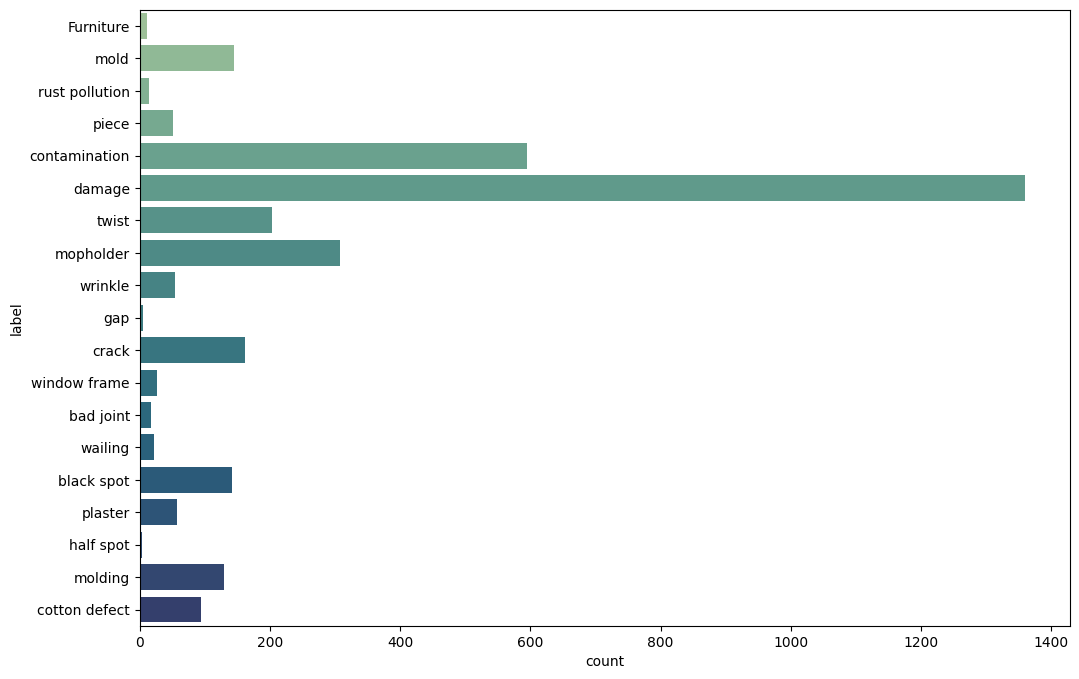

In [17]:
#plt.rc('font', family='NanumGothic') 
plt.figure(figsize=(12,8))
sns.countplot(data=train, y='label',  palette='crest', dodge=False)
plt.show()

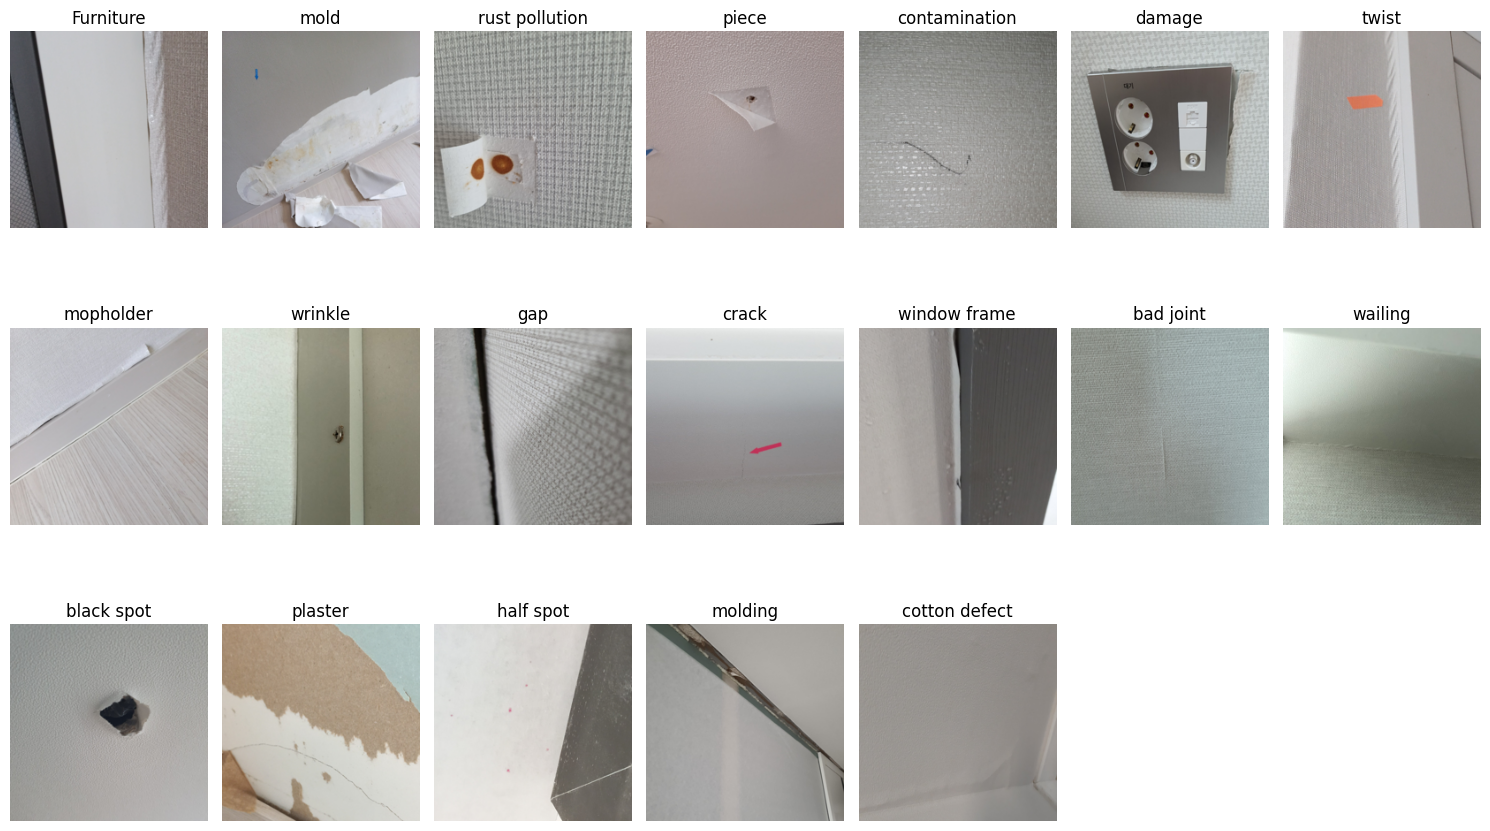

In [18]:
plt.figure(figsize = (15,12))
for idx, i in enumerate(train.label.unique()):
    plt.subplot(4, 7, idx+1)
    
    df = train[train['label'] == i].reset_index(drop = True)
    image_path = df.loc[random.randint(0, len(df)-1), 'path']
    img = Image.open(image_path)
    img = img.resize((224,224))
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
plt.tight_layout()
plt.show()

In [19]:
def plot_images(df, label):
    plt.figure(figsize = (12,12))
    species_df = df[df['label'] == label].reset_index(drop = True)
    plt.suptitle(label)
    for idx, i in enumerate(np.random.choice(species_df['path'], 10)):
        plt.subplot(8,8,idx+1)
        image_path = i
        img = Image.open(image_path)
        img = img.resize((224,224))
        plt.imshow(img)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
     

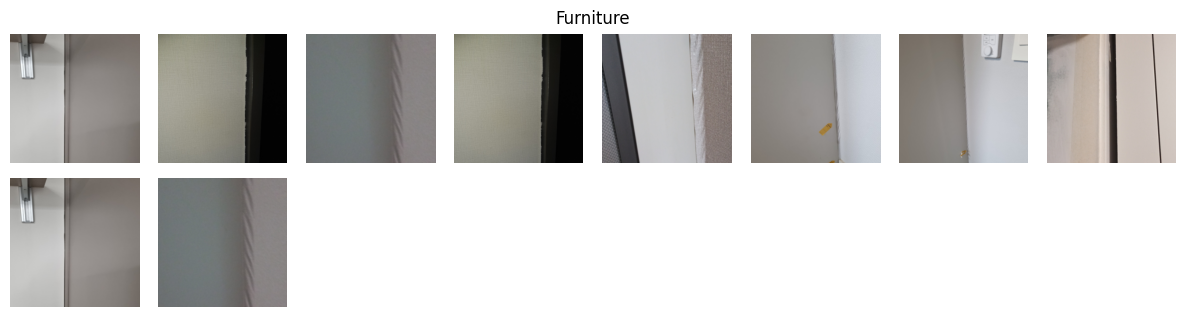

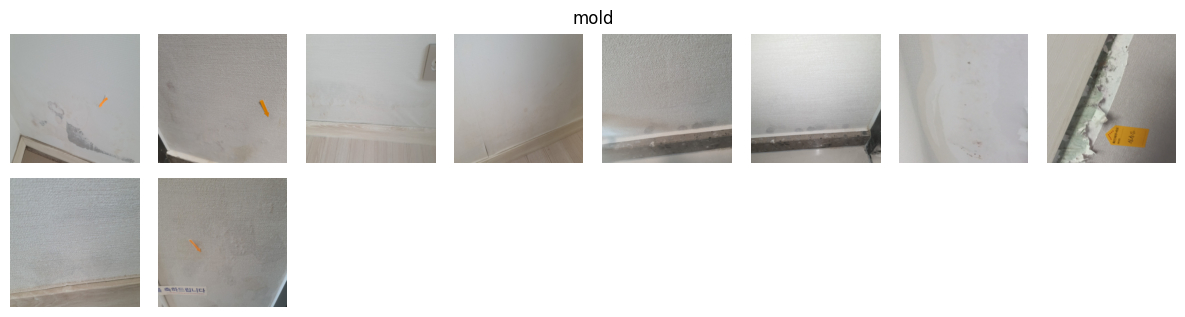

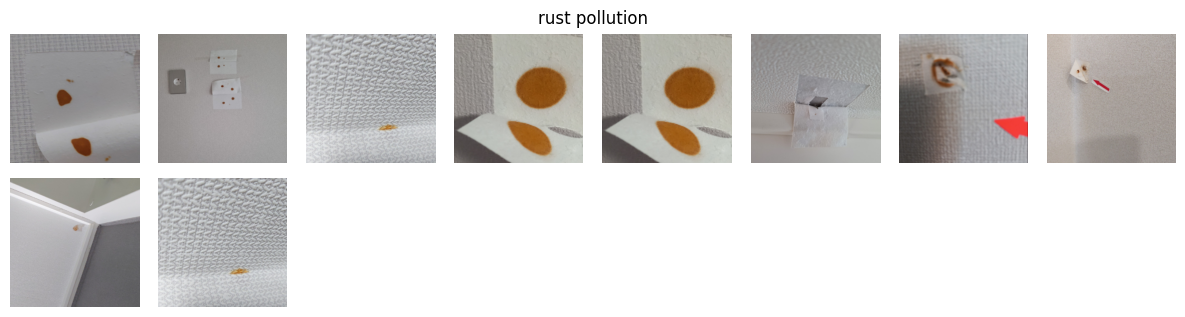

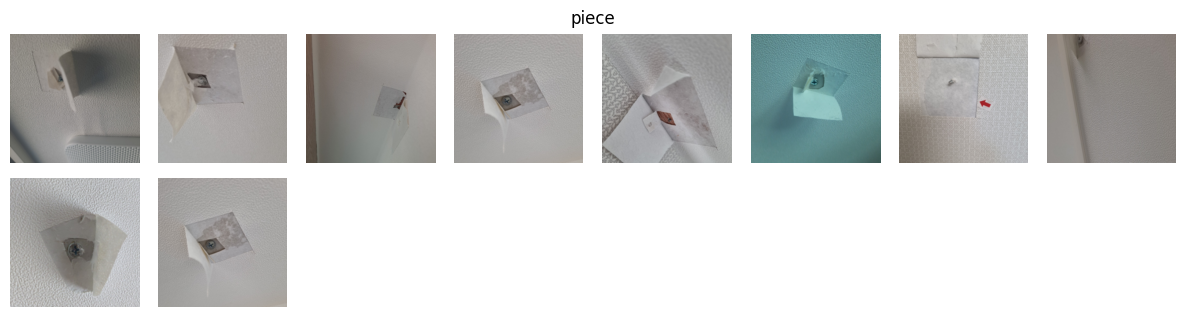

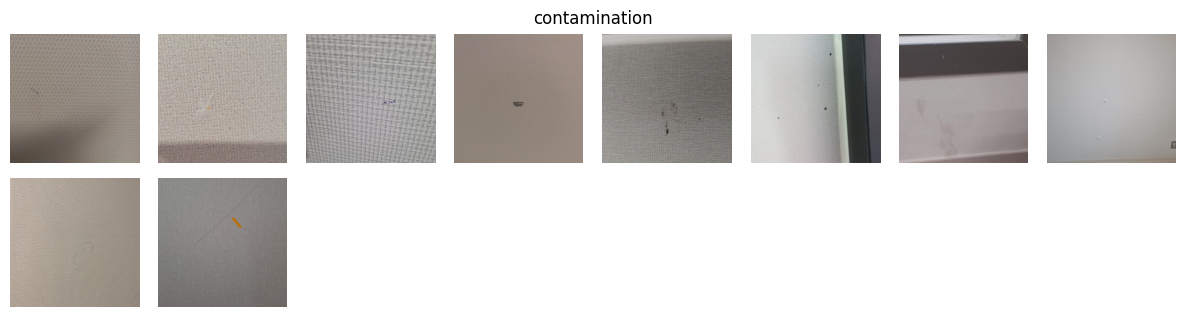

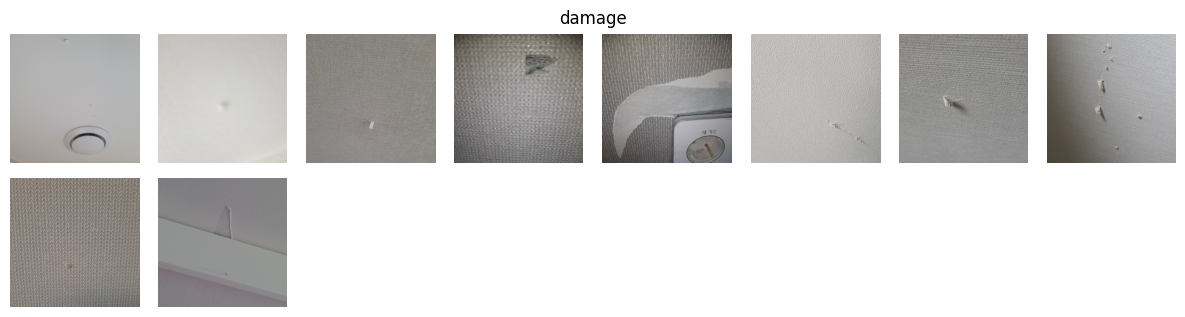

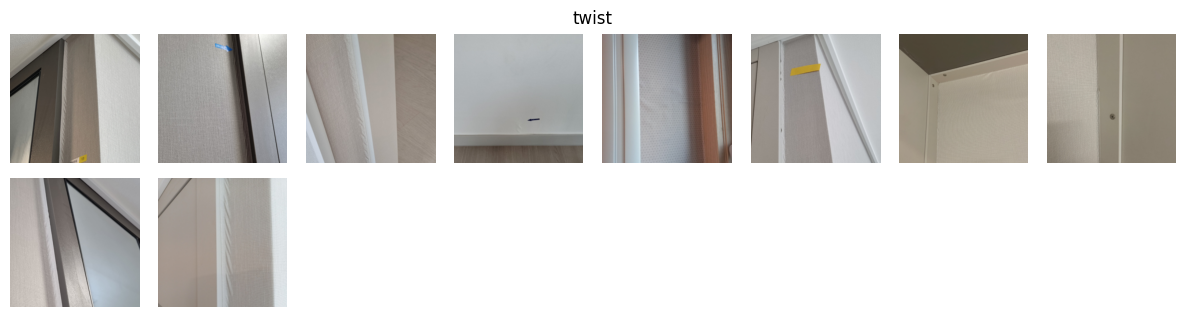

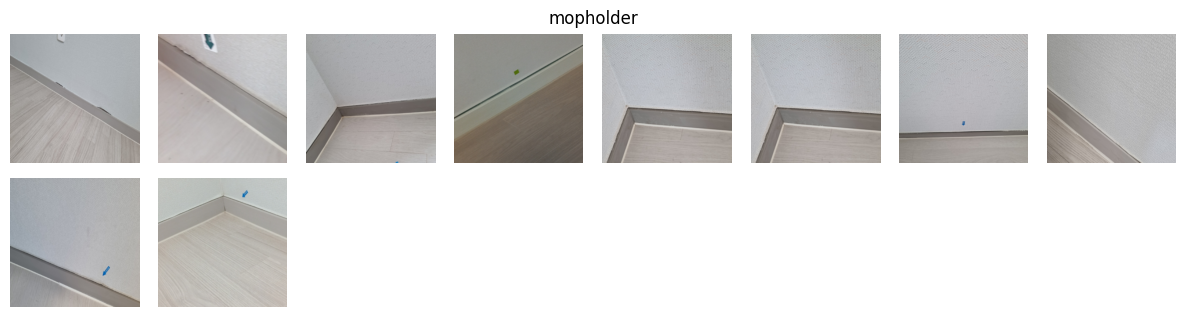

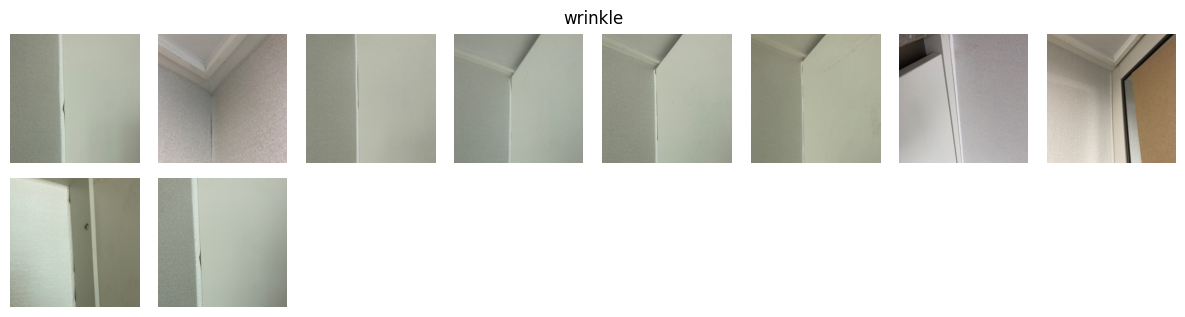

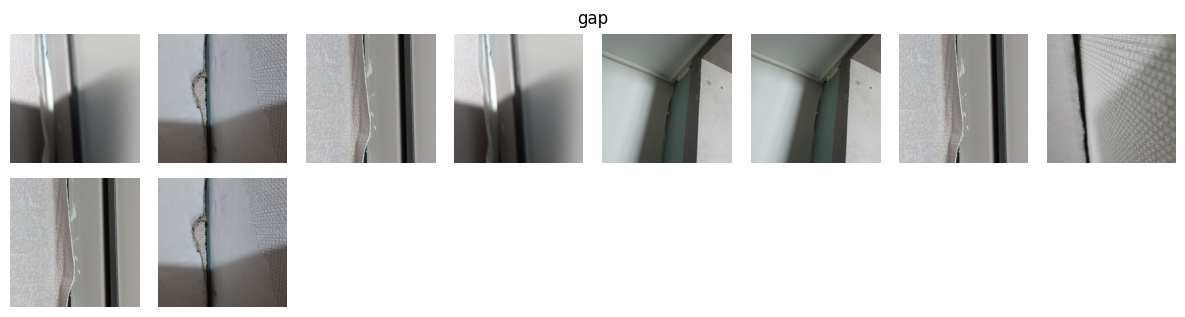

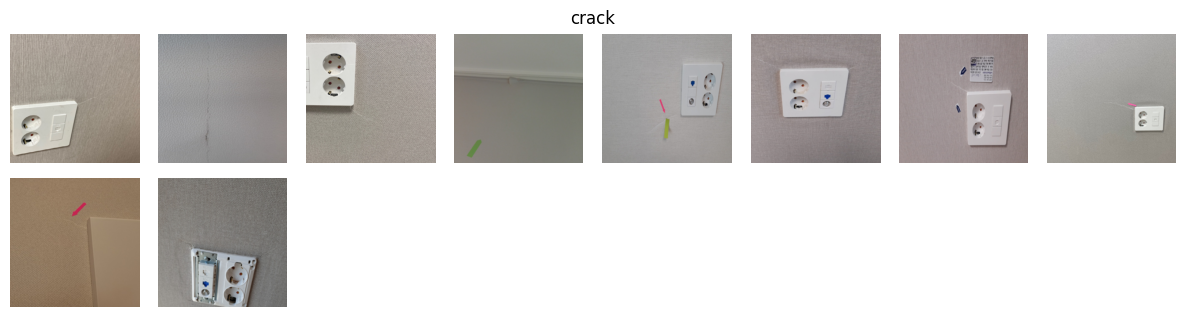

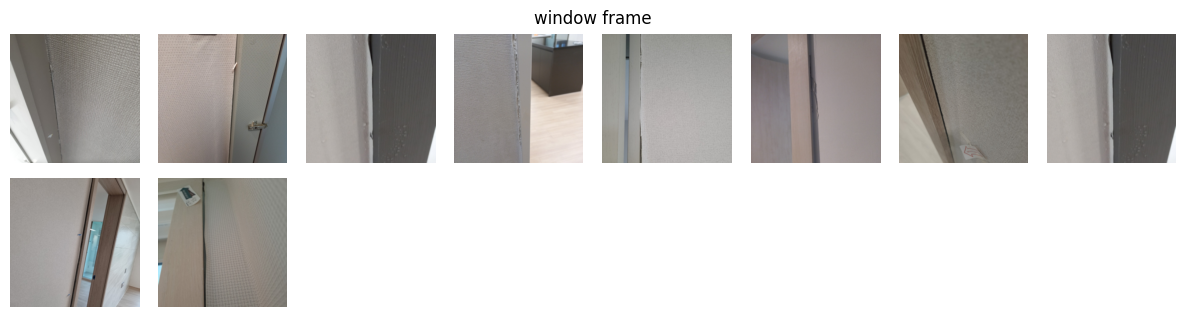

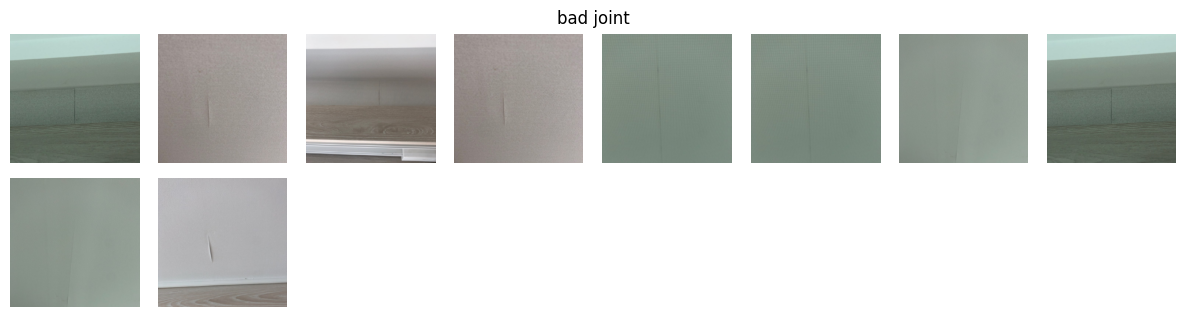

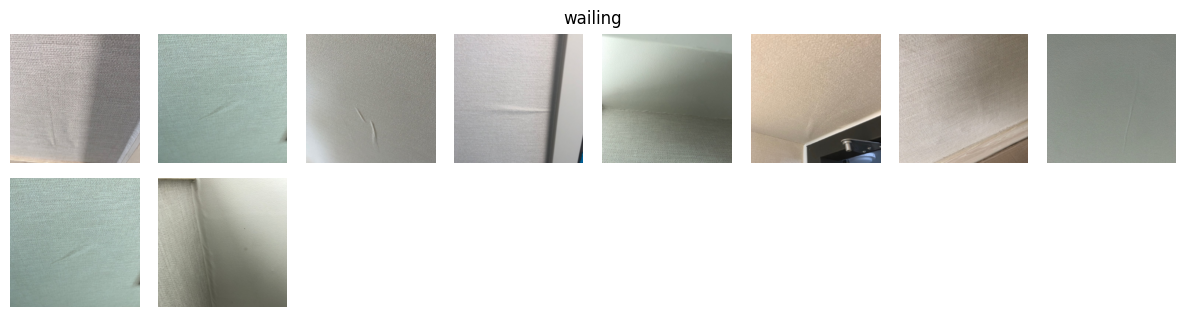

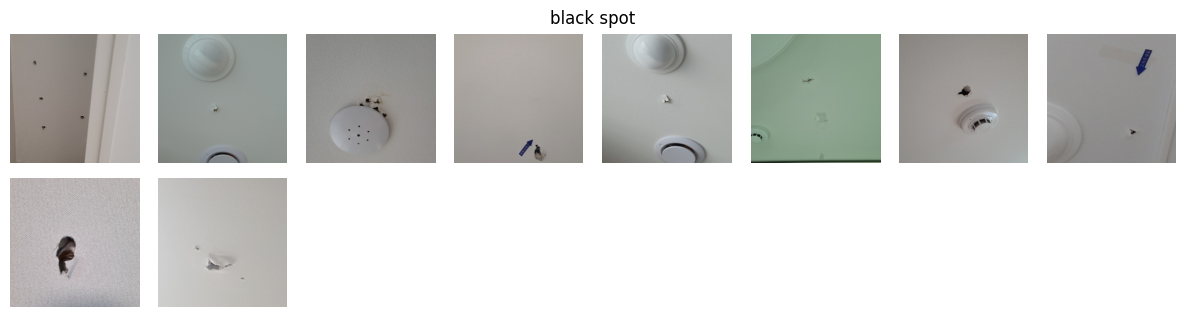

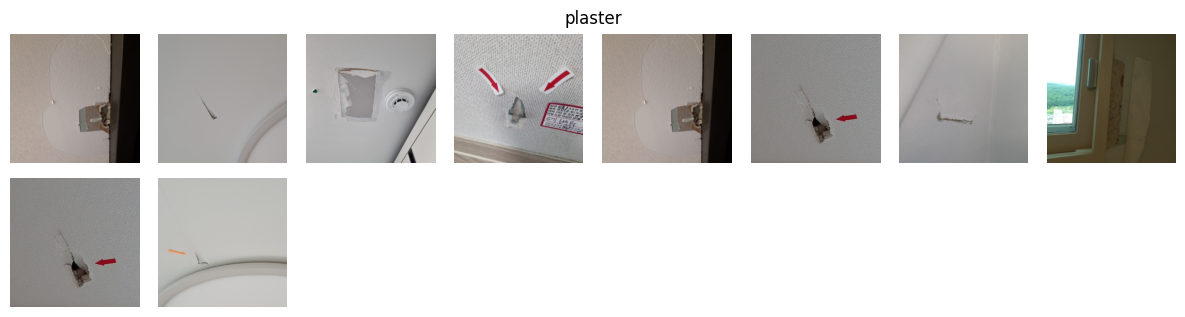

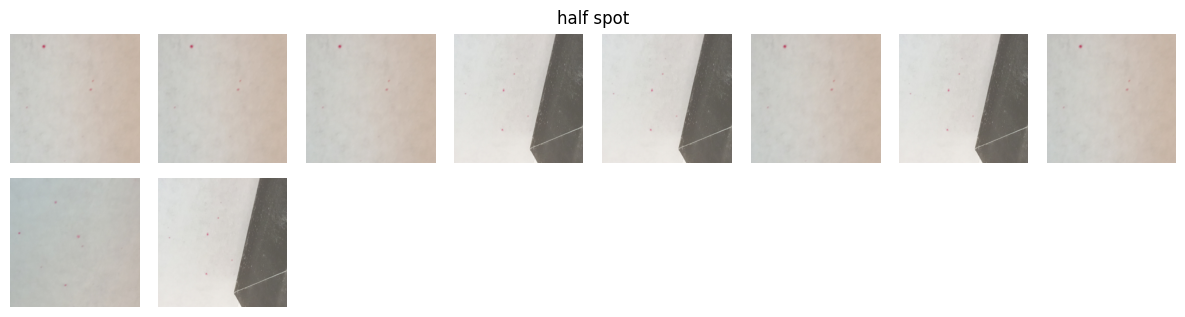

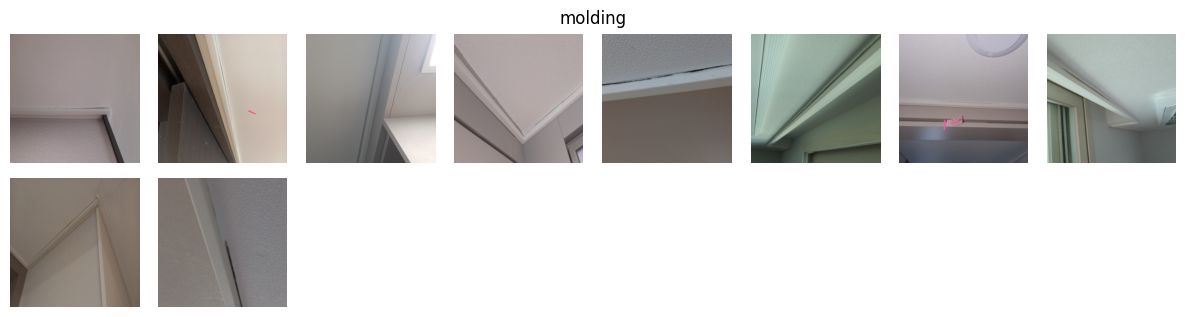

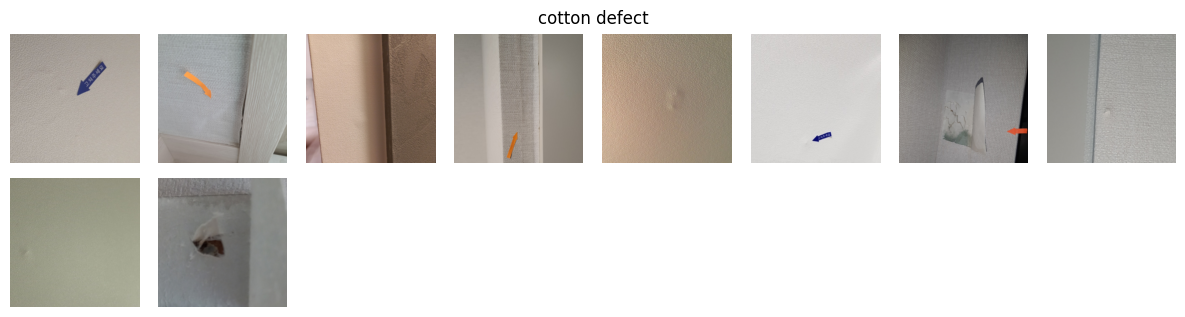

In [20]:
for la in train['label'].unique():
    plot_images(train , label=la)